# Análisis de Modelos de Clasificación y Regresión
Este notebook replica la ejecución de `main.py` con visualizaciones y entrenamiento.

In [1]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
import pandas as pd
from src.utils import (
    cargar_dataset,
    preprocesar_datos_clasificacion,
    preprocesar_datos_regresion,
)
from src.entrenamiento import (
    entrenar_random_forest,
    entrenar_xgboost,
    entrenar_elasticnet,
    entrenar_regresion_cuantil,
)
from src.visualizador import (
    graficar_dispersion_cuantiles,
    graficar_mejores_metricas_modelos_regresion,
    visualizar_matriz_confusion,
    visualizar_curva_roc,
    graficar_metricas_comparativas_subplots,
    visualizar_pred_vs_real,
)
%matplotlib inline


## Carga y preprocesamiento

In [3]:
df = cargar_dataset()
X_train_clf, X_test_clf, y_train_clf, y_test_clf, _, _ = preprocesar_datos_clasificacion(df)
X_train_reg, X_test_reg, y_train_reg, y_test_reg, _ = preprocesar_datos_regresion(df)

📥 Descargando dataset 'adult' desde OpenML...


/home/mparraf/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Entrenamiento de modelos

[RandomForest] Accuracy: 0.8569


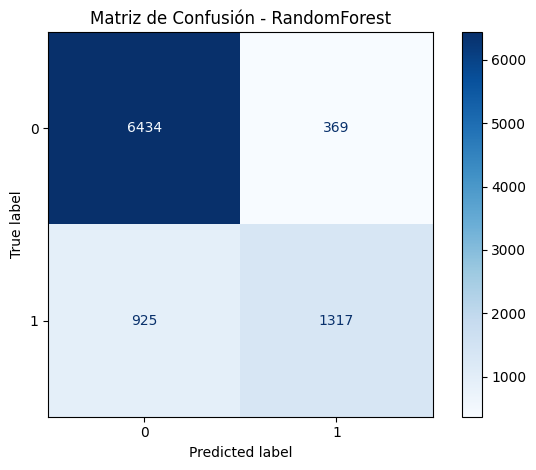

<Figure size 640x480 with 0 Axes>

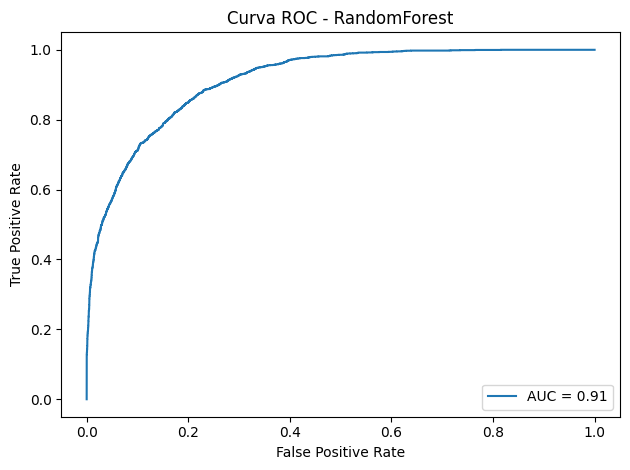

/home/mparraf/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[XGBoost] Accuracy: 0.8669


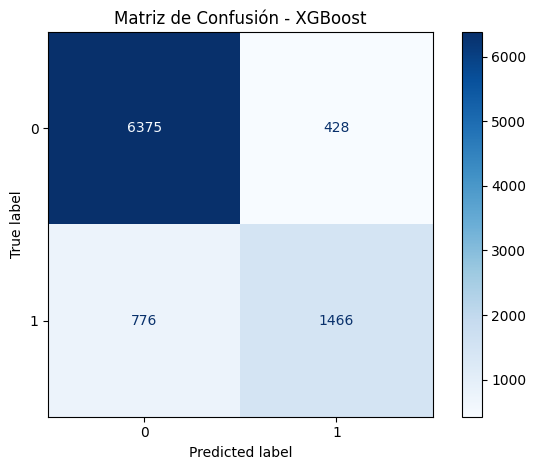

<Figure size 640x480 with 0 Axes>

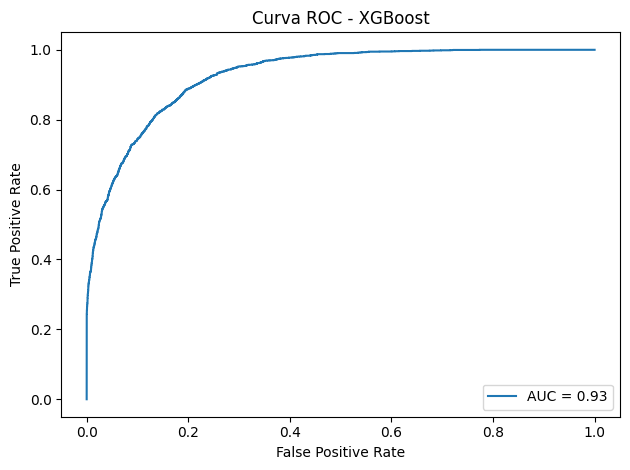

[ElasticNet] Best Params: {'l1_ratio': 0.1, 'alpha': 0.01}
[ElasticNet] RMSE: 0.3426


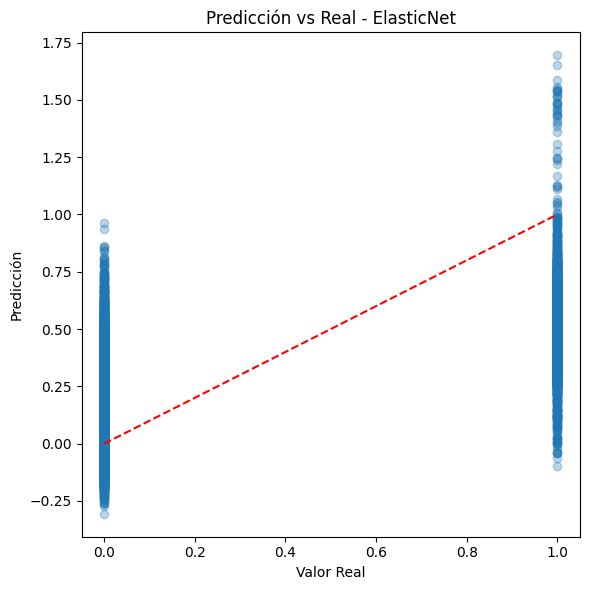

[QuantileRegressor-0.1, α=0.1] Pinball Loss: 0.0244
[QuantileRegressor-0.1, α=0.5] Pinball Loss: 0.0244
[QuantileRegressor-0.1, α=1.0] Pinball Loss: 0.0244
[QuantileRegressor-0.3, α=0.1] Pinball Loss: 0.0731
[QuantileRegressor-0.3, α=0.5] Pinball Loss: 0.0731
[QuantileRegressor-0.3, α=1.0] Pinball Loss: 0.0731
[QuantileRegressor-0.5, α=0.1] Pinball Loss: 0.1218
[QuantileRegressor-0.5, α=0.5] Pinball Loss: 0.1218
[QuantileRegressor-0.5, α=1.0] Pinball Loss: 0.1218
[QuantileRegressor-0.6, α=0.1] Pinball Loss: 0.1461
[QuantileRegressor-0.6, α=0.5] Pinball Loss: 0.1461
[QuantileRegressor-0.6, α=1.0] Pinball Loss: 0.1461
[QuantileRegressor-0.7, α=0.1] Pinball Loss: 0.1008
[QuantileRegressor-0.7, α=0.5] Pinball Loss: 0.1705
[QuantileRegressor-0.7, α=1.0] Pinball Loss: 0.1705
[QuantileRegressor-0.8, α=0.1] Pinball Loss: 0.0785
[QuantileRegressor-0.8, α=0.5] Pinball Loss: 0.1513
[QuantileRegressor-0.8, α=1.0] Pinball Loss: 0.1513
[QuantileRegressor-0.9, α=0.1] Pinball Loss: 0.0756
[QuantileReg

In [4]:
import os


resultados_clf = []
resultados_reg = []
# Crear carpeta outputs si no existe
os.makedirs("outputs", exist_ok=True)

rf_clf = entrenar_random_forest(X_train_clf, y_train_clf, X_test_clf, y_test_clf)
resultados_clf.append(rf_clf)
visualizar_matriz_confusion(y_test_clf, rf_clf.get("y_pred"), metodo="RandomForest")
visualizar_curva_roc(y_test_clf, rf_clf.get("y_prob"), metodo="RandomForest")

xgb_clf = entrenar_xgboost(X_train_clf, y_train_clf, X_test_clf, y_test_clf)
resultados_clf.append(xgb_clf)
visualizar_matriz_confusion(y_test_clf, xgb_clf.get("y_pred"), metodo="XGBoost")
visualizar_curva_roc(y_test_clf, xgb_clf.get("y_prob"), metodo="XGBoost")

elastic_reg = entrenar_elasticnet(X_train_reg, y_train_reg, X_test_reg, y_test_reg, n_iter=30)
resultados_reg.append(elastic_reg)
visualizar_pred_vs_real(y_test_reg, elastic_reg.get("y_pred"), metodo="ElasticNet")

cuantil_resultados = entrenar_regresion_cuantil(X_train_reg, y_train_reg, X_test_reg, y_test_reg)
resultados_reg.extend(cuantil_resultados)

## Visualización de resultados

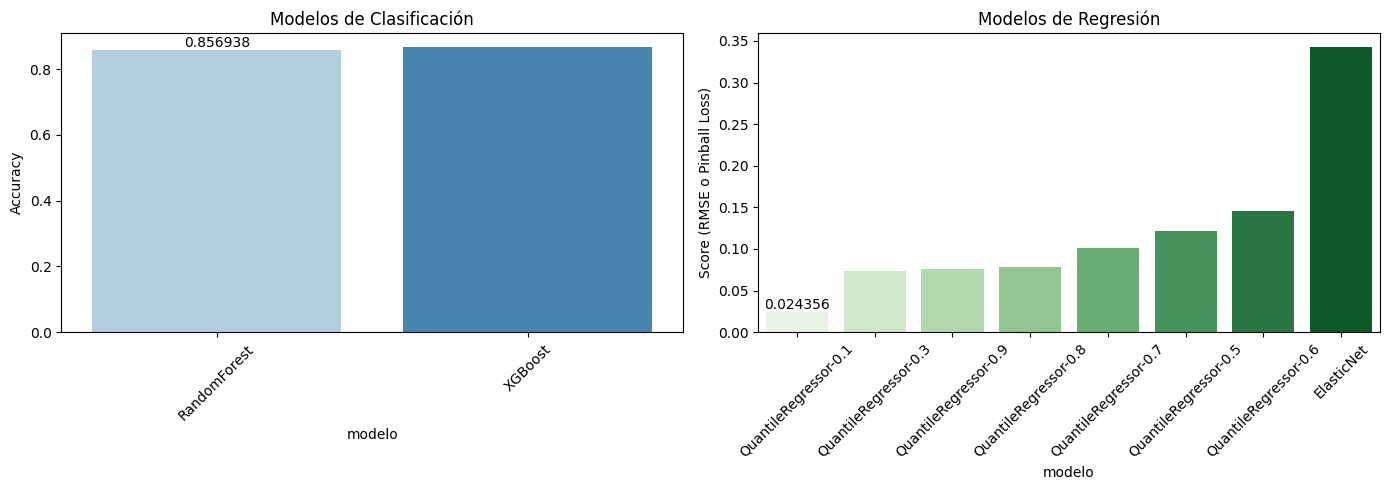

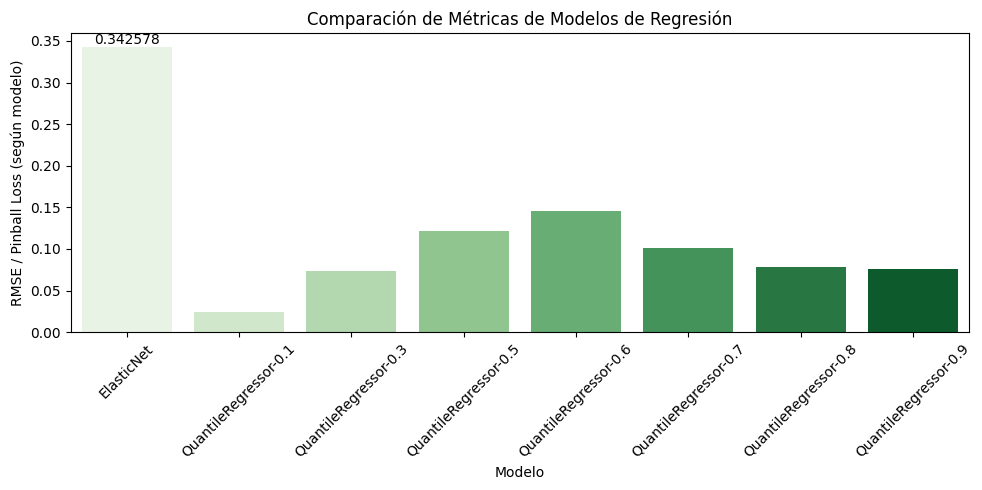

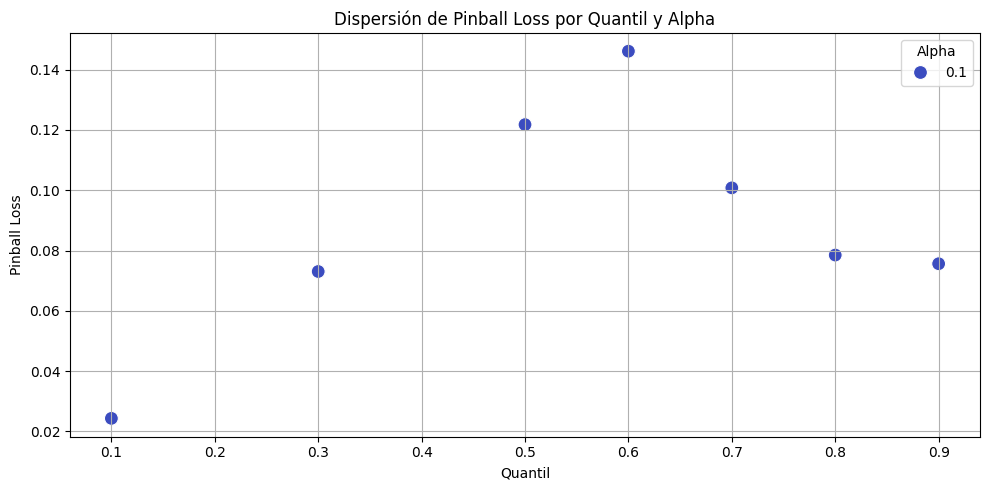


✅ Pipeline completado.


In [5]:
graficar_metricas_comparativas_subplots(resultados_clf, resultados_reg)
graficar_mejores_metricas_modelos_regresion(resultados_reg)
graficar_dispersion_cuantiles(resultados_reg)
print("\n✅ Pipeline completado.")